# **BUSQUEDA EN AMPLITUD EN UNA LISTA DE ADYACENCIA**

### **Función BFS para recorrer una LA**

In [1]:
import graphviz as gv

In [2]:
def bfs_al(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n # parent
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        path[v] = u
        queue.append(v)

  return path

Generamos una LA segun el siguiente texto:

In [3]:
%%file 01a.la
1 4
0 3 5 6
4 5 6
1 7
0 2 6 7
1 2
1 2 4
3 4

Writing 01a.la


Cargamos la LA generada desde el archivo 01a.la a un arreglo tipo numpy en la variable G1

In [4]:
G1 = []
with open("01a.la") as f:
  for line in f:
    if line == "-\n":
      G1.append([])
    else:
      G1.append([int(x) for x in line.split()])

print(G1)

[[1, 4], [0, 3, 5, 6], [4, 5, 6], [1, 7], [0, 2, 6, 7], [1, 2], [1, 2, 4], [3, 4]]


Creamos una función para dibujar el grafo utilizando la libreria gv, indicando si ser un grafo dirigido o no. Si le pasamos una lista con una ruta, debera colorear dicha ruta (path).

In [5]:
def drawG_al(G, directed=False, path=[]):
  graph = gv.Digraph("di-anyname") if directed else gv.Graph("anyname")
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v in G[u]:
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        graph.edge(str(u), str(v))
      elif directed:
        graph.edge(str(u), str(v))
  return graph

Visualizamos el grafo no dirigido del arreglo G1

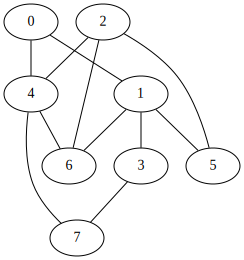

In [8]:
drawG_al(G1)

Hacemos una busqueda en amplitud (BFS) del grafo no dirigido G1 partiendo del nodo 5 (retorna una cola de nodos visitados en la variable path).

In [9]:
path = bfs_al(G1, 5)
path

[1, 5, 5, 1, 2, -1, 1, 3]

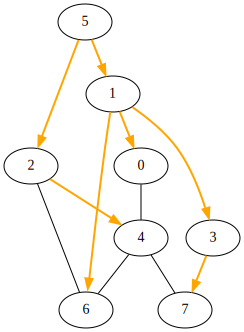

In [10]:
drawG_al(G1, path=path)